In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


In [4]:
df=pd.read_csv('bank.csv')
df.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   contact    11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  deposit    11162 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [5]:
cols=['contact','month','day','duration',]
df.drop(cols, axis=1, inplace=True)

In [5]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,previous,deposit
Dtypes,int64,object,object,object,int64,object,object,int64,int64,int64,object
Num_Uniq,76,12,3,4,3805,2,2,36,472,34,2


In [6]:
cols_to_change =['job','marital','education','housing','loan','deposit']
df[cols_to_change] = df[cols_to_change].astype("category")
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,previous,deposit
Dtypes,int64,category,category,category,int64,category,category,int64,int64,int64,category
Num_Uniq,76,12,3,4,3805,2,2,36,472,34,2


In [7]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,previous,deposit
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

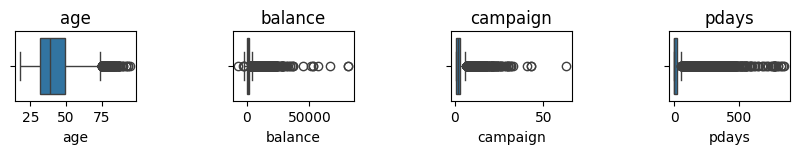

In [9]:
plt.figure(figsize=(10, 9))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(6, 4, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=.8, hspace=.8)
plt.show()

In [10]:
for col in num_cols[:-1]:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = df[df[col] > upper][col].values
    lower_outliers = df[df[col] < lower][col].values    
    df[col].replace(upper_outliers, upper, inplace=True)
    df[col].replace(lower_outliers, lower, inplace=True)

In [11]:
for col in cat_cols:
    mode = df[col].mode()[0]
    vc = df[col].value_counts()

    categories = vc.index.to_numpy()
    counts = vc.values

    outliers = categories[counts <= 10]

    df[col].replace(outliers, mode, inplace=True)

In [12]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

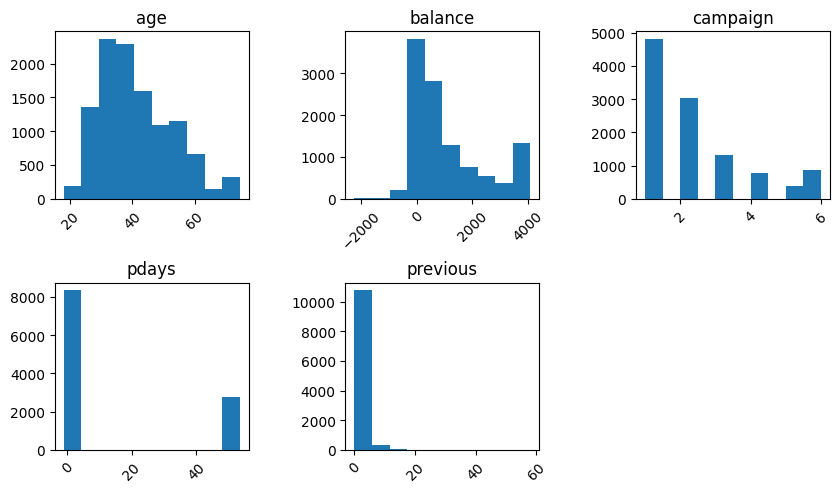

In [13]:
plt.figure(figsize=(10, 25))
for i, col in enumerate(num_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.hist(df[col])
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

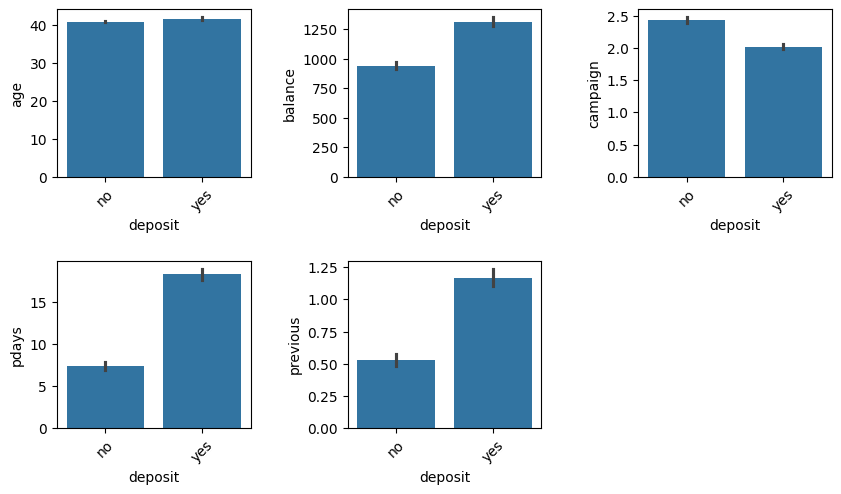

In [14]:
num_cols = df.select_dtypes("number").columns.tolist()
plt.figure(figsize=(10, 25))
for i,col in enumerate(num_cols):
    plt.subplot(8, 3, i+1)
    sns.barplot(x='deposit', y=col, data=df)
    plt.xticks(rotation=45)
    
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()
    

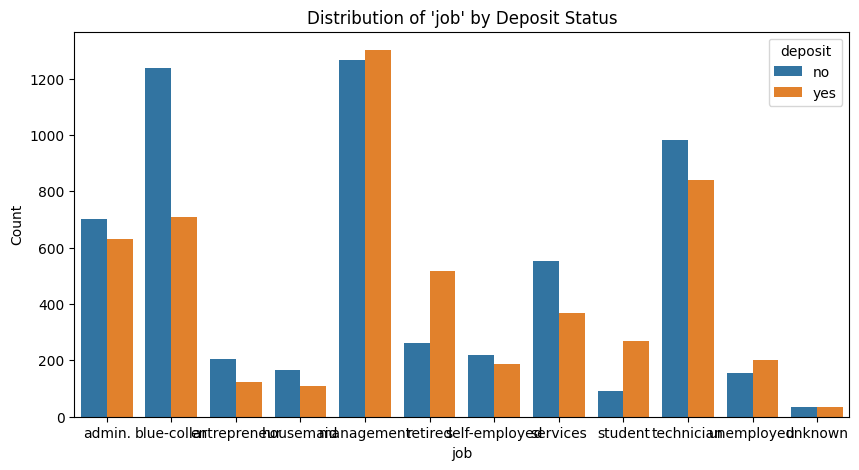

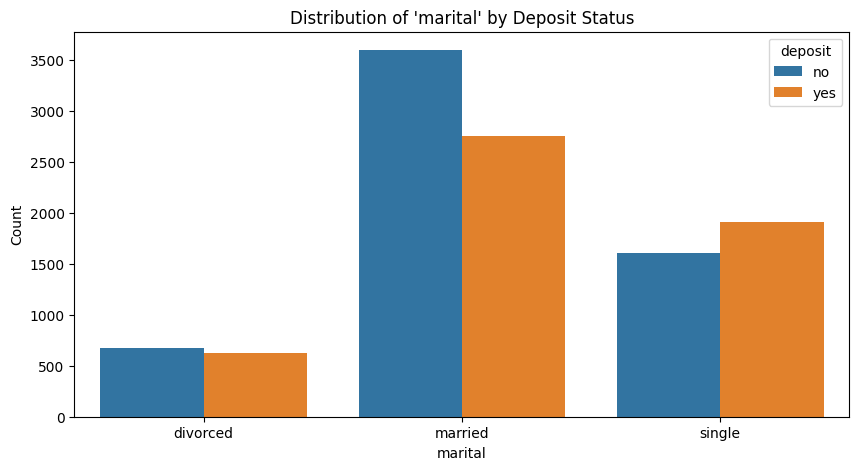

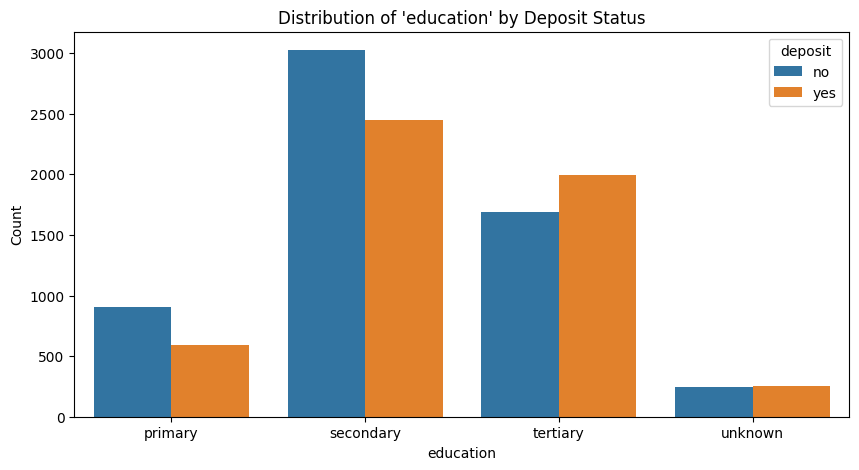

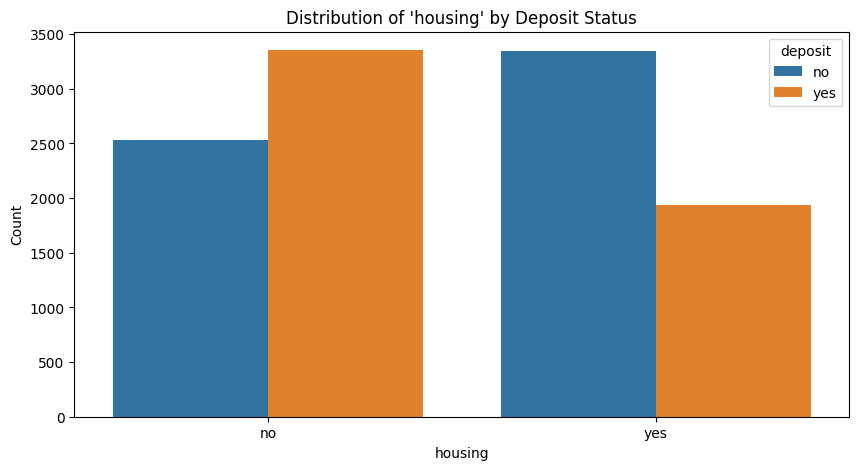

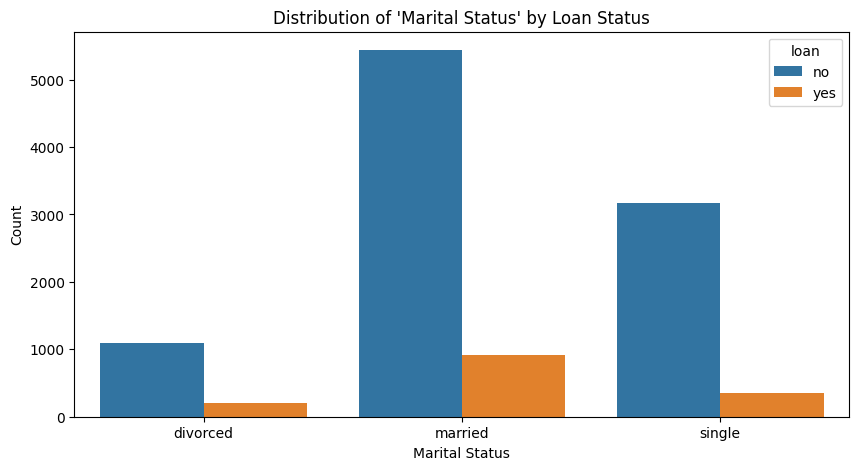

In [15]:
for col in cat_cols[:-2]:
    plt.figure(figsize=(10, 5))
    # Aggregating counts for each category in col grouped by deposit
    agg = df.groupby(["deposit", col])["loan"].count().reset_index()
    sns.barplot(data=agg, x=col, y="loan", hue="deposit")
    plt.title(f"Distribution of '{col}' by Deposit Status")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.show()
    print("=" * 50)

# For the marital vs. loan plot
plt.figure(figsize=(10, 5))
agg = df.groupby(["loan", "marital"])["deposit"].count().reset_index()
sns.barplot(data=agg, x="marital", y="deposit", hue="loan")
plt.title("Distribution of 'Marital Status' by Loan Status")
plt.ylabel("Count")
plt.xlabel("Marital Status")
plt.show()
    

In [16]:
df.duplicated().sum()

np.int64(56)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum()

np.int64(0)

In [28]:
X=df.drop("deposit", axis=1)
y=df[["deposit"]]

In [19]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns 

scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.fit_transform(X[num_cols])

In [20]:
pd.DataFrame({"Dtypes": X.dtypes, "Num_Uniq": X.nunique()}).T

,age,job,marital,education,balance,housing,loan,campaign,pdays,previous
Dtypes,float64,category,category,category,float64,category,category,float64,float64,float64
Num_Uniq,58,12,3,4,2970,2,2,6,39,34


In [ ]:
string_cols = ['job', 'marital', 'education', 'housing', 'loan']
pd.DataFrame(df[string_cols].nunique()).T

,job,marital,education,housing,loan
0,12,3,4,2,2


In [22]:
ordinal_cols = ['education', 'marital', 'housing', 'loan']
binary_cols = ['job']

In [23]:
labels = {
          'education': {'unknown': 0, 'primary': 1, 'tertiary': 2, 'secondary':3},
          'marital': {'single': 0, 'divorced': 1, 'married': 2},
          'housing': {'no': 0, 'yes': 1},
          'loan': {'no': 0, 'yes': 1}
         }

In [24]:
for col in ordinal_cols:
    X[col] = X[col].map(labels[col])

In [25]:
from category_encoders import BinaryEncoder
binary_encoder = BinaryEncoder(cols=binary_cols)
X = binary_encoder.fit_transform(X)

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y["deposit"] = label_encoder.fit_transform(y["deposit"])